In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.6
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate06_same_xlim'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)

C:\Users\foxku\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.22it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.34it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.70it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.34it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.12it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.59it/s]


Validation result: best alpha 0.1, best score 0.7998698962133904, scores {0.0: 1.205961540372966, 0.01: 1.577030484785109, 0.1: 0.7998698962133904, 1.0: 0.8431051000739526, 10.0: 0.9530550489978848, 100.0: 0.988307356493161}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.13it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.57it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.04it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.29it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.54it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.96it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.46it/s]


Validation result: best alpha 0.1, best score 0.7998698962133904, scores {0.0: 1.2059615403729662, 0.01: 1.577030484785109, 0.1: 0.7998698962133904, 1.0: 0.8431051000739526, 10.0: 0.9530550489978847, 100.0: 0.988307356493161}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 109.24it/s]


loss 0.36676190104343415
loss 0.23556093307516485
loss 0.2005518076326911
loss 0.1953046805112782
loss 0.20703956487664435
loss 0.20013811615763502
loss 0.21044667494384736
loss 0.19825332313860472
loss 0.1901765071128025
loss 0.1859419516682368
number of runs used by missForest: 10
loss: 0.1859419516682368
loss 0.35559022110634453
loss 0.2263320008581425
loss 0.18920405524425635
loss 0.18783850284262704
loss 0.1879475441105265
loss 0.1911953199716232
loss 0.19615035654961507
loss 0.19428748660923428
loss 0.20036470614404878
loss 0.2070908908683779
number of runs used by missForest: 10
loss: 0.2070908908683779


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 274.23it/s]


iteration: 1
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.29it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.47it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.45it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.52it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.94it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.78it/s]


Validation result: best alpha 0.1, best score 0.8041063589304328, scores {0.0: 0.9707756067164444, 0.01: 0.8064434041334014, 0.1: 0.8041063589304328, 1.0: 0.849978527758, 10.0: 0.9622901981722023, 100.0: 1.0019987513500244}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.73it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.19it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.53it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.19it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.00it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.42it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.60it/s]


Validation result: best alpha 0.1, best score 0.8041063589304328, scores {0.0: 0.9707756067164444, 0.01: 0.8064434041334014, 0.1: 0.8041063589304328, 1.0: 0.849978527758, 10.0: 0.9622901981722023, 100.0: 1.0019987513500244}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.78it/s]


loss 0.37703125100284396
loss 0.2381376337309469
loss 0.2135798781539216
loss 0.21467380498648342
loss 0.21626954897178174
loss 0.21882036467816995
loss 0.21069770438281557
loss 0.21546186933412767
loss 0.2092906947665551
loss 0.2170386129335359
number of runs used by missForest: 10
loss: 0.2170386129335359
loss 0.40023271385737497
loss 0.26413144401465954
loss 0.2265741986670271
loss 0.22333931447991795
loss 0.22518512742385088
loss 0.231310504951202
loss 0.2351261520839658
loss 0.23044955699287914
loss 0.2268537897218531
loss 0.2292116678742958
number of runs used by missForest: 10
loss: 0.2292116678742958


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 230.39it/s]


iteration: 2


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.97it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.00it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.23it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.12it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.28it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.50it/s]


Validation result: best alpha 0.1, best score 0.8392952890696797, scores {0.0: 1.0719238081749303, 0.01: 3.005286204999061, 0.1: 0.8392952890696797, 1.0: 0.8746728463427215, 10.0: 0.9772080338860042, 100.0: 1.013521721655507}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.73it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.10it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.48it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.10it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.33it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.54it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.43it/s]


Validation result: best alpha 0.1, best score 0.8392952890696795, scores {0.0: 1.0719238081749303, 0.01: 3.0052862049990616, 0.1: 0.8392952890696795, 1.0: 0.8746728463427215, 10.0: 0.9772080338860042, 100.0: 1.013521721655507}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 74.23it/s]


loss 0.3616154335103233
loss 0.258781543405684
loss 0.22720098300669203
loss 0.21583422576567576
loss 0.20003894441173845
loss 0.1752235942267188
loss 0.17503315322571358
loss 0.1802856934274141
loss 0.18579673122364027
loss 0.1929481014313198
number of runs used by missForest: 10
loss: 0.1929481014313198
loss 0.36170718427254095
loss 0.244037480813265
loss 0.19688096221104662
loss 0.1890298779602449
loss 0.18828496942420392
loss 0.1921145371193791
loss 0.193098685665374
loss 0.19314853774807852
loss 0.20835702718346044
loss 0.2127345917793453
number of runs used by missForest: 10
loss: 0.2127345917793453


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 274.37it/s]


iteration: 3
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.59it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.92it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.43it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.65it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.50it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.79it/s]


Validation result: best alpha 1.0, best score 0.8660692851123588, scores {0.0: 1.8179462590657653, 0.01: 4.341813826958245, 0.1: 4.457083572435752, 1.0: 0.8660692851123588, 10.0: 0.9651826896802871, 100.0: 0.9989222701847598}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.95it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.48it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.39it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.20it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.62it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.73it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.52it/s]


Validation result: best alpha 1.0, best score 0.8660692851123587, scores {0.0: 1.8179462590657653, 0.01: 4.341813826958246, 0.1: 4.457083572435751, 1.0: 0.8660692851123587, 10.0: 0.9651826896802871, 100.0: 0.9989222701847597}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 68.54it/s]


loss 0.33150519034612286
loss 0.22468286330743287
loss 0.18058774506372555
loss 0.18734243088538902
loss 0.19516235977116436
loss 0.20321826082714356
loss 0.20749847512817726
loss 0.21120937989024305
loss 0.20604109821637737
loss 0.21250423664981352
number of runs used by missForest: 10
loss: 0.21250423664981352
loss 0.3296706373807436
loss 0.23317123988783367
loss 0.18163078476065733
loss 0.18347792886380712
loss 0.1762905025130353
loss 0.1800707460044186
loss 0.1749623508476325
loss 0.1771386507213691
loss 0.17575390882284256
loss 0.1839841339825073
number of runs used by missForest: 10
loss: 0.1839841339825073


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 268.80it/s]
C:\Users\foxku\Downloads\Github uploaded codes\shapley missing\SHAP missing revision 1 all experiments\funcs\explain.py:152: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  get_spearmanr = lambda shap_vals_method: np.array([spearmanr(shap_values_ori.values[:,i], shap_vals_method.values[:,i])[0]


iteration: 4
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.25it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.82it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.77it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.20it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.13it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.81it/s]


Validation result: best alpha 1.0, best score 0.8709940728427961, scores {0.0: 6.107541103074361, 0.01: 4.332381223730275, 0.1: 0.8832765414156031, 1.0: 0.8709940728427961, 10.0: 0.9731165704746868, 100.0: 1.005893424431128}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.66it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.57it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.30it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.89it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.46it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.27it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.18it/s]


Validation result: best alpha 1.0, best score 0.8709940728427961, scores {0.0: 6.107541103074362, 0.01: 4.332381223730275, 0.1: 0.8832765414156031, 1.0: 0.8709940728427961, 10.0: 0.9731165704746868, 100.0: 1.005893424431128}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 65.98it/s]


loss 0.35260548601025027
loss 0.2476656064594235
loss 0.20227231125975972
loss 0.18452132795272622
loss 0.1753454373751559
loss 0.18719563840949438
loss 0.1820383748076475
loss 0.17256937334248443
loss 0.16656723873391724
loss 0.16578890761808648
number of runs used by missForest: 10
loss: 0.16578890761808648
loss 0.36282685280911753
loss 0.26812050752231825
loss 0.22351739454241815
loss 0.23627684252931652
loss 0.24183489948963194
loss 0.25536553253653116
loss 0.26031056320673157
loss 0.2611390609176287
loss 0.270307632436872
loss 0.2646982187197074
number of runs used by missForest: 10
loss: 0.2646982187197074


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 472.01it/s]


iteration: 5
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.54it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.26it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.30it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.19it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.42it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.19it/s]


Validation result: best alpha 1.0, best score 0.8671817598434671, scores {0.0: 4.53877410710458, 0.01: 12.957565359806708, 0.1: 1.865058887985794, 1.0: 0.8671817598434671, 10.0: 0.9793660008504423, 100.0: 1.017460976276608}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.79it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.74it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.71it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.19it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.86it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.08it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.01it/s]


Validation result: best alpha 1.0, best score 0.8671817598434671, scores {0.0: 4.538774107104581, 0.01: 12.957565359806708, 0.1: 1.865058887985794, 1.0: 0.8671817598434671, 10.0: 0.9793660008504423, 100.0: 1.017460976276608}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.04it/s]


loss 0.3412842372571099
loss 0.22664558780772304
loss 0.19568065551242622
loss 0.19123160675779377
loss 0.18118518478529574
loss 0.18261395628560256
loss 0.1830751189906503
loss 0.17970529994847811
loss 0.1803390244324854
loss 0.17897921116033147
number of runs used by missForest: 10
loss: 0.17897921116033147
loss 0.3329394146294483
loss 0.22760402942504213
loss 0.19390818913947083
loss 0.19148712521561037
loss 0.20453944035398855
loss 0.21072811519639065
loss 0.2102352699488054
loss 0.22245847690199652
loss 0.22974141266090947
loss 0.22458390125706715
number of runs used by missForest: 10
loss: 0.22458390125706715


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 469.00it/s]
C:\Users\foxku\Downloads\Github uploaded codes\shapley missing\SHAP missing revision 1 all experiments\funcs\explain.py:152: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  get_spearmanr = lambda shap_vals_method: np.array([spearmanr(shap_values_ori.values[:,i], shap_vals_method.values[:,i])[0]


iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.72it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.69it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.84it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.04it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.05it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.31it/s]


Validation result: best alpha 0.1, best score 0.8139614291271785, scores {0.0: 1.2390673870431856, 0.01: 18.315715679549225, 0.1: 0.8139614291271785, 1.0: 0.8382782383181268, 10.0: 0.9441031704911595, 100.0: 0.9811269845541574}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.33it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.79it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.94it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.50it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.56it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.09it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.84it/s]


Validation result: best alpha 0.1, best score 0.8139614291271784, scores {0.0: 1.2390673870431856, 0.01: 18.315715679549225, 0.1: 0.8139614291271784, 1.0: 0.8382782383181268, 10.0: 0.9441031704911595, 100.0: 0.9811269845541574}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 155.64it/s]


loss 0.3480313209451894
loss 0.24319036370151662
loss 0.19150272602116516
loss 0.20009950653214711
loss 0.21207358001555476
loss 0.22630726623200195
loss 0.22320255333815375
loss 0.2277925234705259
loss 0.2327415685176312
loss 0.23127253484573754
number of runs used by missForest: 10
loss: 0.23127253484573754
loss 0.3356048838921704
loss 0.22976838364423838
loss 0.19972082598908034
loss 0.2091822115990627
loss 0.20420814174423757
loss 0.20475620996554264
loss 0.2096020458098054
loss 0.20968712310615464
loss 0.20603574048252438
loss 0.20915966621992396
number of runs used by missForest: 10
loss: 0.20915966621992396


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 459.40it/s]


iteration: 7
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.41it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.72it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.21it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.13it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.27it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.27it/s]


Validation result: best alpha 1.0, best score 0.8398963869692093, scores {0.0: 4.049361130731655, 0.01: 4.292801755293739, 0.1: 0.9214761755146484, 1.0: 0.8398963869692093, 10.0: 0.9398306416057494, 100.0: 0.9725849166846152}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.84it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.67it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.42it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.22it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.90it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.09it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.08it/s]


Validation result: best alpha 1.0, best score 0.8398963869692094, scores {0.0: 4.049361130731655, 0.01: 4.292801755293739, 0.1: 0.9214761755146484, 1.0: 0.8398963869692094, 10.0: 0.9398306416057494, 100.0: 0.9725849166846152}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 126.86it/s]


loss 0.34889524016868717
loss 0.25163085399806734
loss 0.20798203450764316
loss 0.20010285613766957
loss 0.21033324966734873
loss 0.21869225942913723
loss 0.22338646556294378
loss 0.21036388340400272
loss 0.21213349553577396
loss 0.21365106791784577
number of runs used by missForest: 10
loss: 0.21365106791784577
loss 0.3687656905992679
loss 0.23706833184438436
loss 0.18018832525877296
loss 0.17238918665762273
loss 0.1641489378169595
loss 0.17807493116174838
loss 0.18588097731514067
loss 0.1896509875851622
loss 0.19418979566633446
loss 0.19123944876581123
number of runs used by missForest: 10
loss: 0.19123944876581123


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 448.83it/s]


iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.41it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.63it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.78it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.74it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.65it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.21it/s]


Validation result: best alpha 0.1, best score 0.8170388341882243, scores {0.0: 0.947244518315446, 0.01: 1.3804585255213653, 0.1: 0.8170388341882243, 1.0: 0.8563309833314628, 10.0: 0.9686808386462616, 100.0: 1.007548401958061}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.92it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.76it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.92it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.77it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.74it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.37it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.79it/s]


Validation result: best alpha 0.1, best score 0.8170388341882243, scores {0.0: 0.947244518315446, 0.01: 1.3804585255213653, 0.1: 0.8170388341882243, 1.0: 0.8563309833314628, 10.0: 0.9686808386462616, 100.0: 1.007548401958061}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.50it/s]


loss 0.33347204115270834
loss 0.22661224165280253
loss 0.1969295154500608
loss 0.19471284928392385
loss 0.21329987937096898
loss 0.20013216835540762
loss 0.2034667518304786
loss 0.1996153620832
loss 0.20937502334060498
loss 0.21189852846952484
number of runs used by missForest: 10
loss: 0.21189852846952484
loss 0.3488935034201488
loss 0.2371001860969894
loss 0.1969966569649059
loss 0.2109718408596063
loss 0.20534743887233872
loss 0.20828906309822298
loss 0.21378565402361904
loss 0.22653454857344307
loss 0.23067014457544804
loss 0.23071422446284617
number of runs used by missForest: 10
loss: 0.23071422446284617


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 279.84it/s]


iteration: 9
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.57it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.57it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.31it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.75it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.34it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.36it/s]


Validation result: best alpha 1.0, best score 0.8427043476350549, scores {0.0: 2.5601320880904135, 0.01: 8.670860800794129, 0.1: 1.4139927002171235, 1.0: 0.8427043476350549, 10.0: 0.9746331289531184, 100.0: 1.0192052015450581}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.50it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.57it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.15it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.78it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.73it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.88it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.29it/s]


Validation result: best alpha 1.0, best score 0.8427043476350549, scores {0.0: 2.5601320880904135, 0.01: 8.670860800794129, 0.1: 1.4139927002171235, 1.0: 0.8427043476350549, 10.0: 0.9746331289531184, 100.0: 1.0192052015450581}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50.00it/s]


loss 0.35561827735911483
loss 0.26604281461835044
loss 0.2540798404420887
loss 0.25734943194802296
loss 0.2360553435191454
loss 0.25403908021300736
loss 0.2683261957840347
loss 0.2702076035370496
loss 0.2653279213593894
loss 0.26695635838199405
number of runs used by missForest: 10
loss: 0.26695635838199405
loss 0.3624166923686578
loss 0.28998408892395106
loss 0.24999529567348316
loss 0.2487765410367085
loss 0.23850574774482358
loss 0.24962217774272746
loss 0.23426925526586767
loss 0.23212097358043138
loss 0.22578434454239518
loss 0.2211135225058457
number of runs used by missForest: 10
loss: 0.2211135225058457


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 352.05it/s]
C:\Users\foxku\Downloads\Github uploaded codes\shapley missing\SHAP missing revision 1 all experiments\funcs\explain.py:152: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  get_spearmanr = lambda shap_vals_method: np.array([spearmanr(shap_values_ori.values[:,i], shap_vals_method.values[:,i])[0]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
bmi & 0.092 & 0.720 & 0.060 & 0.069 & 0.068 & 0.065 & 0.070 & 0.071 \\
s5 & 0.091 & 0.251 & 0.068 & 0.076 & 0.076 & 0.071 & 0.070 & 0.070 \\
bp & 0.041 & 0.365 & 0.045 & 0.041 & 0.039 & 0.042 & 0.034 & 0.042 \\
s6 & 0.034 & 0.124 & 0.036 & 0.033 & 0.032 & 0.034 & 0.032 & 0.044 \\
s3 & 0.031 & 0.072 & 0.035 & 0.037 & 0.038 & 0.049 & 0.039 & 0.037 \\
s2 & 0.026 & 0.077 & 0.033 & 0.034 & 0.036 & 0.033 & 0.034 & 0.036 \\
sex & 0.026 & 0.049 & 0.015 & 0.025 & 0.034 & 0.026 & 0.029 & 0.003 \\
age & 0.024 & 0.081 & 0.031 & 0.027 & 0.031 & 0.033 & 0.032 & 0.034 \\
s1 & 0.024 & 0.084 & 0.027 & 0.028 & 0.030 & 0.026 & 0.030 & 0.031 \\
s4 & 0.017 & 0.038 & 0.034 & 0.035 & 0.030 & 0.035 & 0.033 & 0.037 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.62  0.531 0.486 0.602 0.5   0.751]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.177 0.038 0.04  0.038 0.044 0.039 0.045]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.409 0.415 0.447 0.43  0.471 0.438 0.497]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.608 0.   ]
 [0.617 0.   ]
 [0.598 0.   ]
 [0.61  0.   ]
 [0.57  0.   ]
 [0.602 0.   ]
 [0.515 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[ 0.175  0.287  0.174  0.185  0.31   0.249  0.321  0.08   0.371  0.22 ]
 [ 0.14   0.214  0.542  0.311 -0.004  0.084  0.442  0.21   0.508  0.238]
 [ 0.109  0.289  0.446  0.179  0.055  0.094  0.261  0.128  0.633 

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.175361
Mean Imputation,0.619715,0.139518
MICE,0.531476,0.108942
DIMV,0.486120,0.080955
missForest,0.602182,0.075586
SOFT-IMPUTE,0.500206,0.096943
GAIN,0.751293,0.142390


imputation MSE versus Spearman statistic


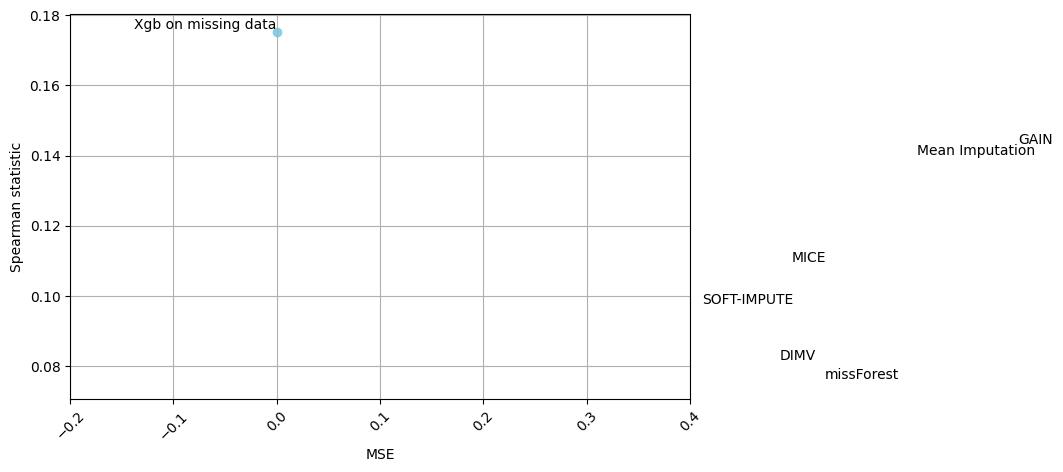

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Mean Imputation') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.2, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.408860,0.177180
Mean Imputation,0.414979,0.038247
MICE,0.447185,0.039860
DIMV,0.429960,0.038079
missForest,0.470531,0.043791
SOFT-IMPUTE,0.437843,0.038550
GAIN,0.496579,0.044858


imputation MSE versus Shapley MSE


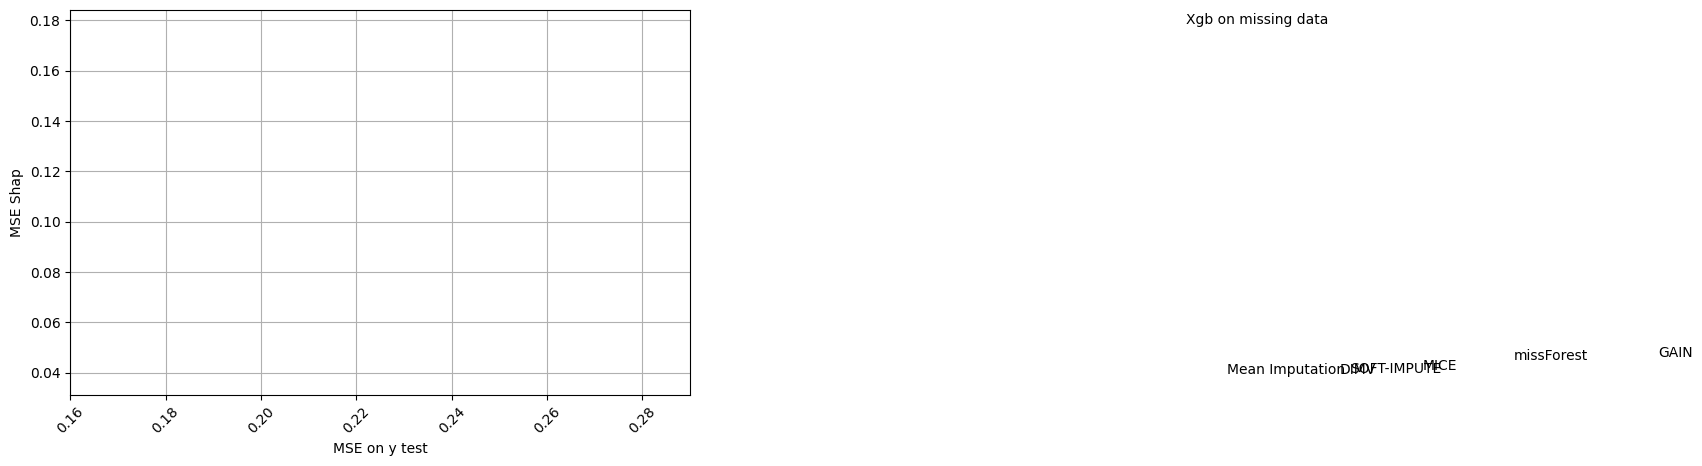

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.16, 0.29)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.177180
Mean Imputation,0.619715,0.038247
MICE,0.531476,0.039860
DIMV,0.486120,0.038079
missForest,0.602182,0.043791
SOFT-IMPUTE,0.500206,0.038550
GAIN,0.751293,0.044858


imputation MSE versus Shapley MSE


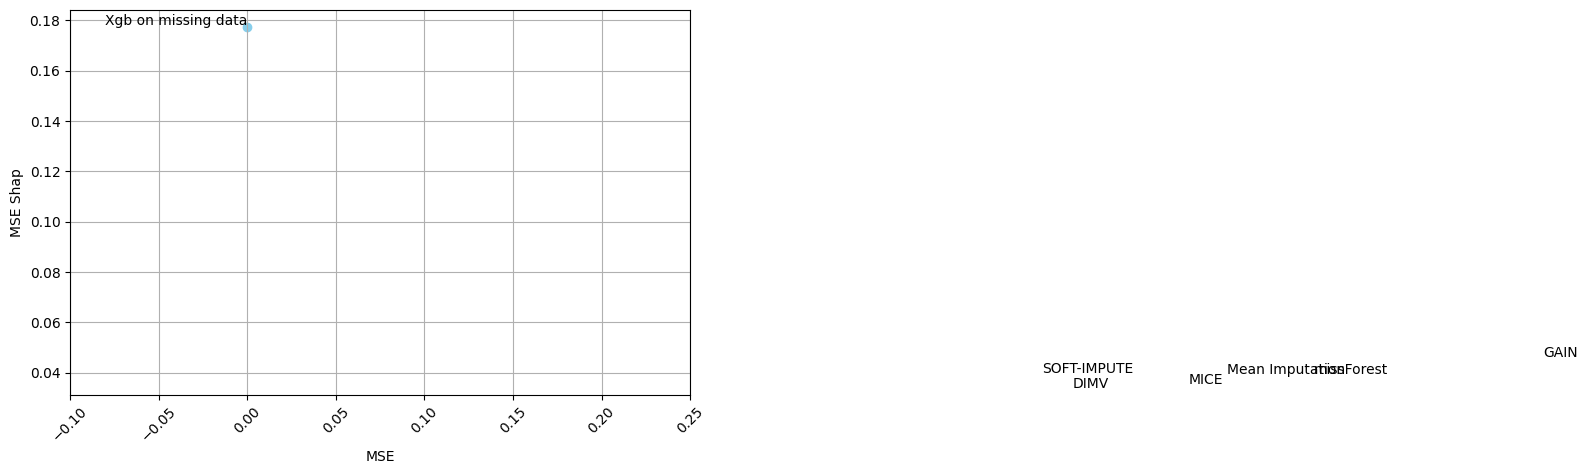

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

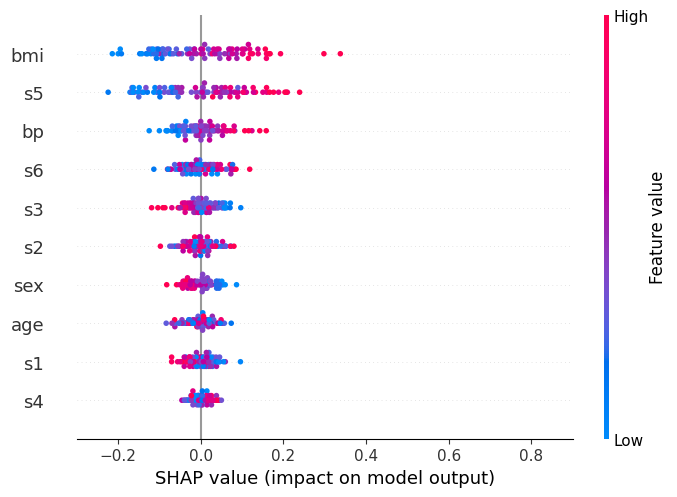

In [24]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.xlim(-0.3, 0.9)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

C:\Users\foxku\.conda\envs\tf\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


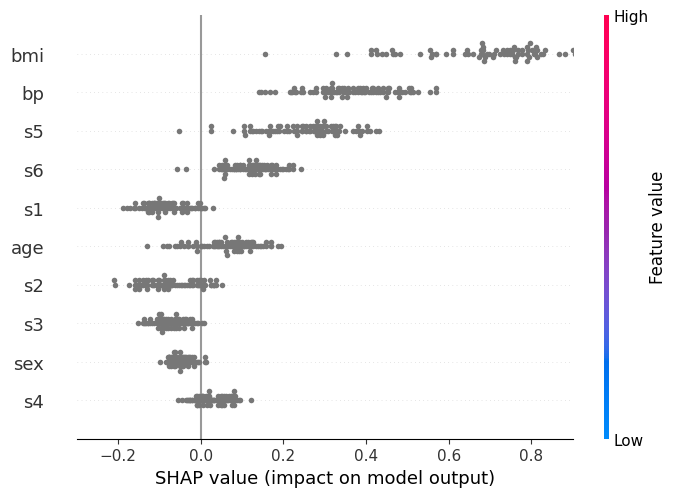

In [25]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.xlim(-0.3, 0.9)    
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

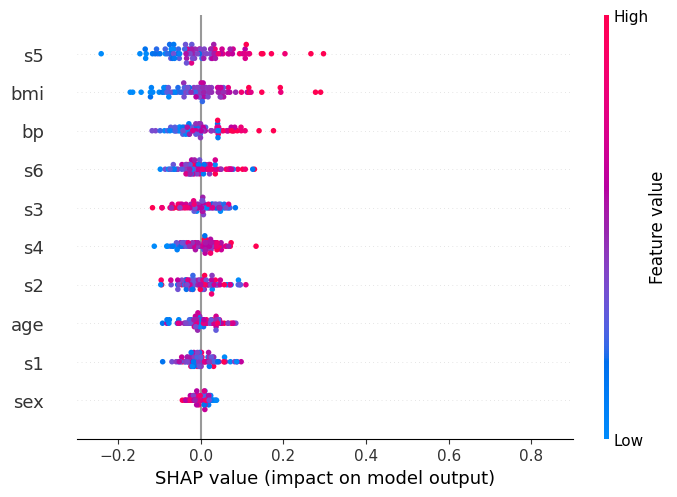

In [26]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.xlim(-0.3, 0.9)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

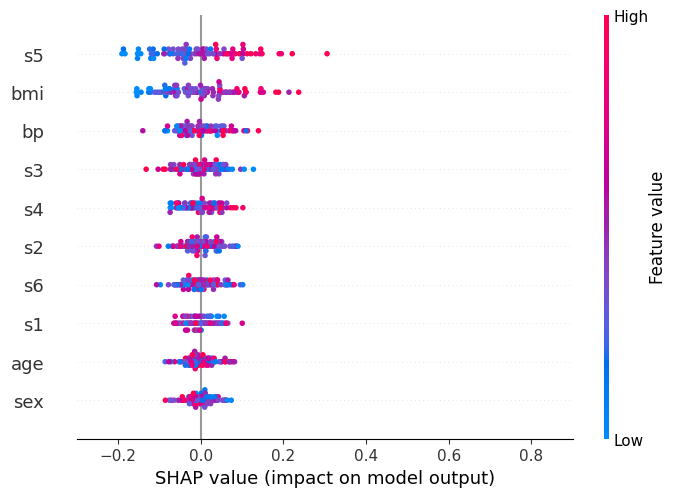

In [27]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.xlim(-0.3, 0.9)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

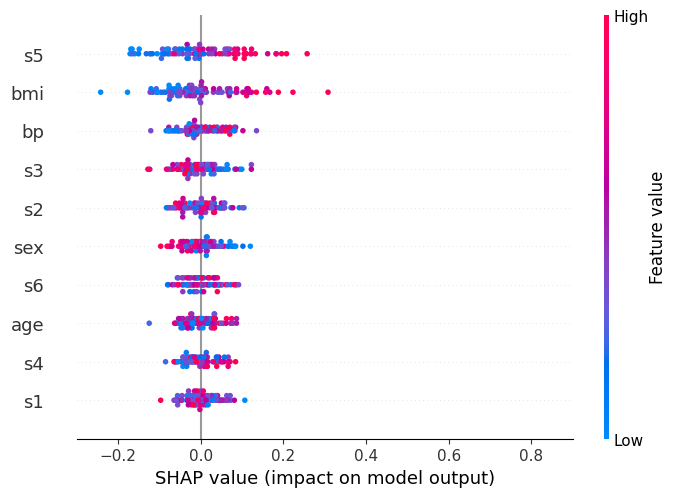

In [28]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.xlim(-0.3, 0.9)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

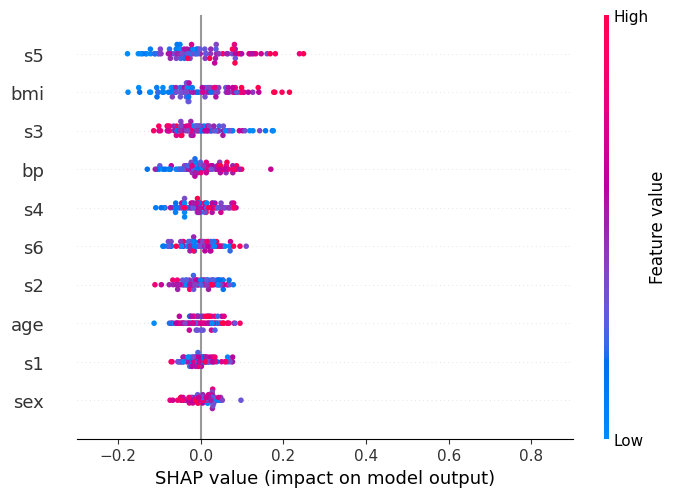

In [29]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.xlim(-0.3, 0.9)    
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

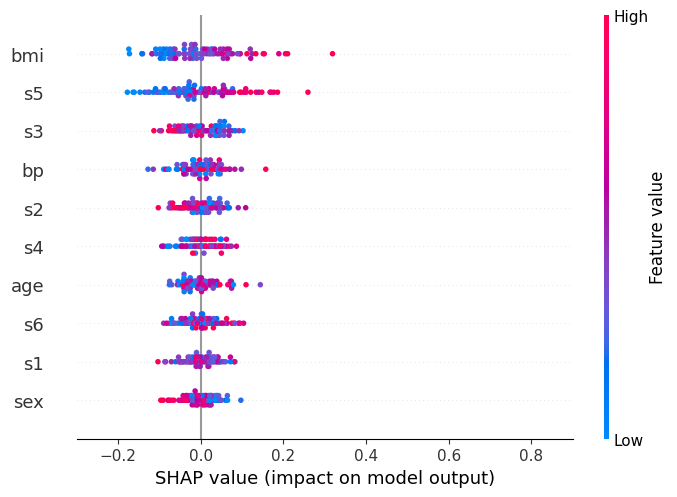

In [30]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.xlim(-0.3, 0.9)  
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

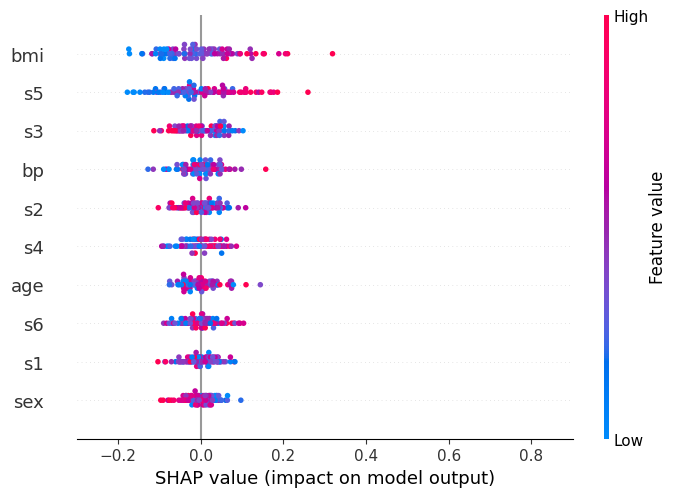

In [31]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.xlim(-0.3, 0.9)   
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

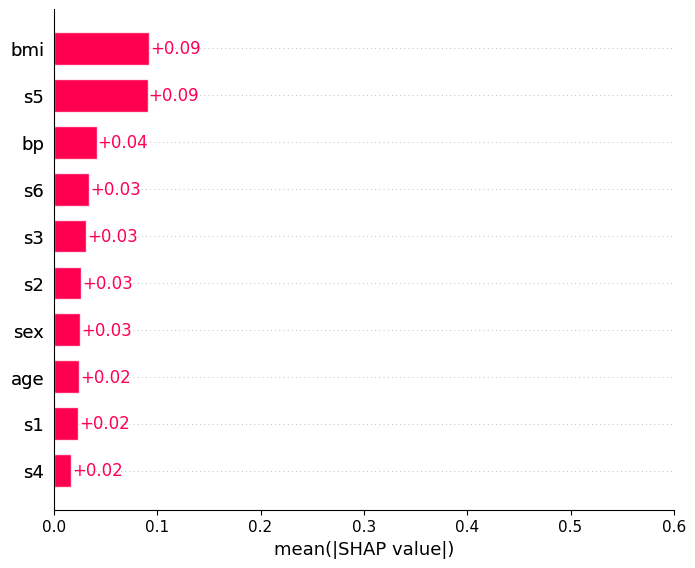

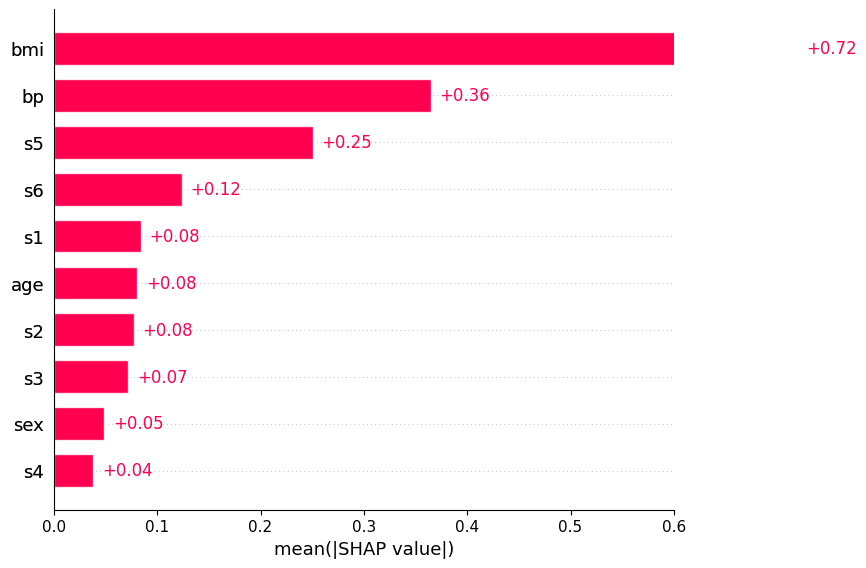

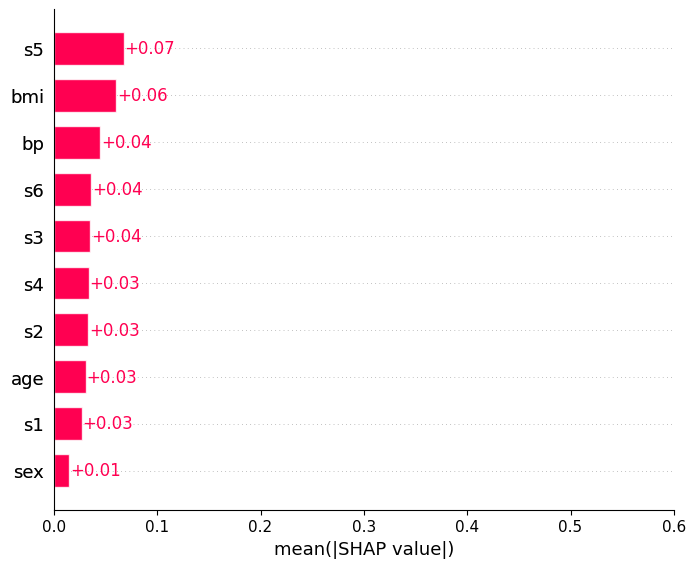

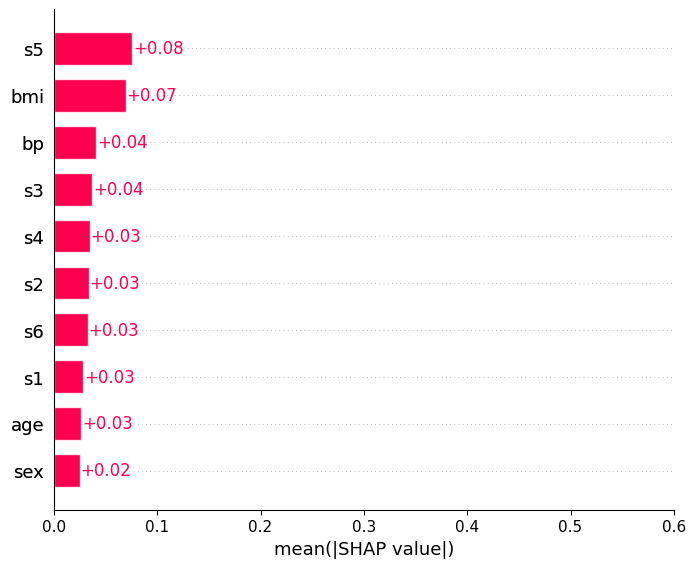

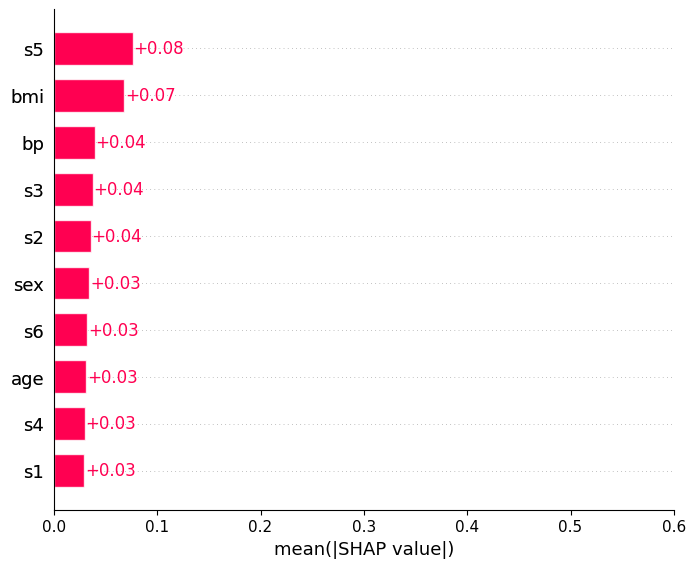

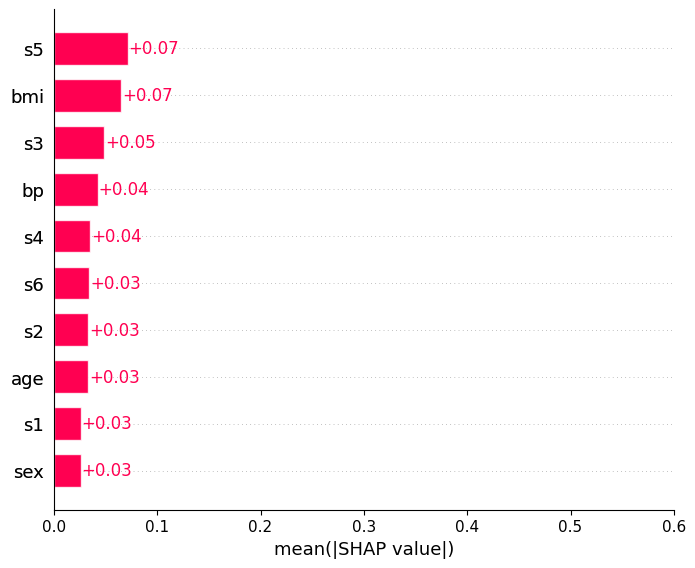

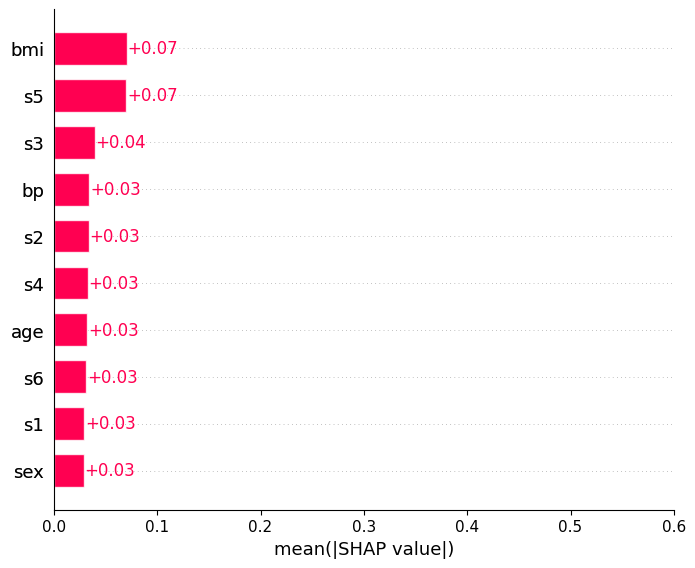

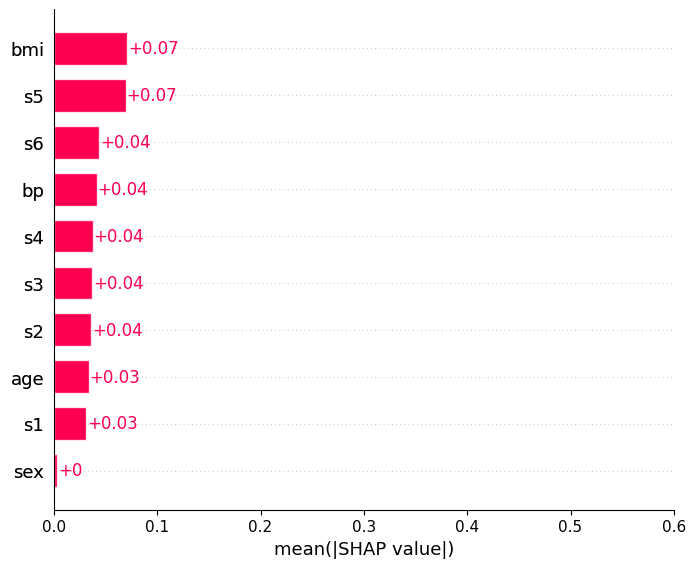

In [32]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.xlim(0.0, 0.6)  
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

<Figure size 6400x4800 with 0 Axes>

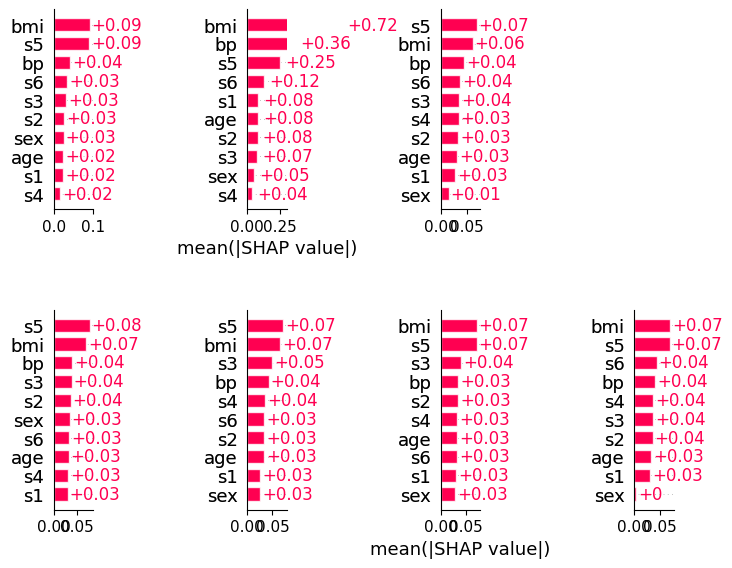

In [33]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[0,3])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_soft, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_gain, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

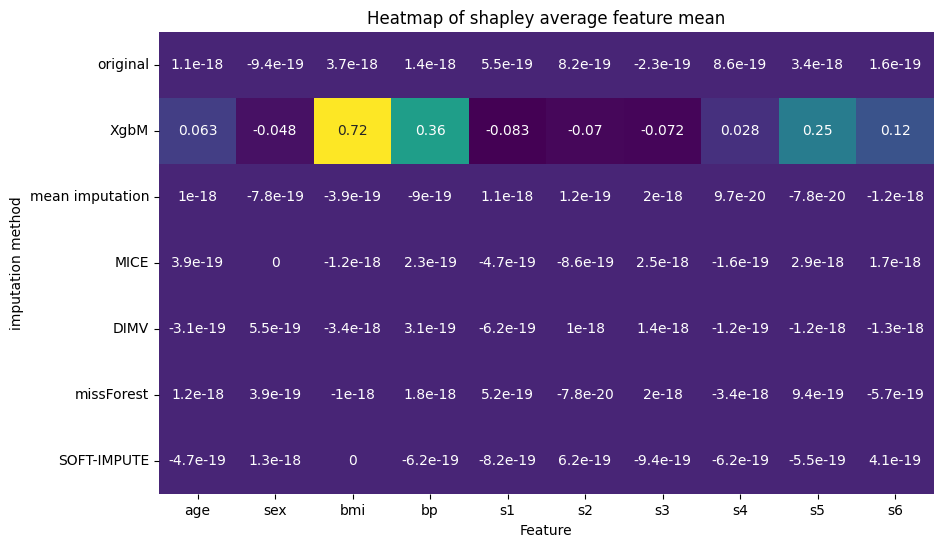

In [34]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()